In [1]:
df<- read.csv('d:/data/zoo/zoo.csv')
head(df)

animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1


In [2]:
library(dplyr)
df<-df %>% select(-animal_name)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 101  17

hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1



 1  2  3  4  5  6  7 
41 20  5 13  4  8 10 

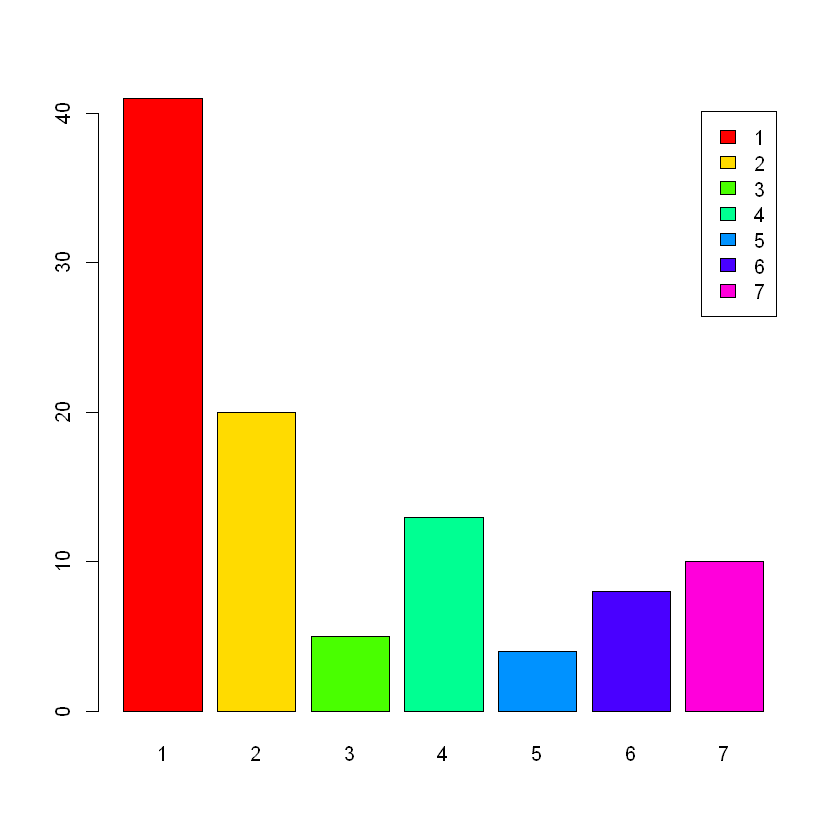

In [3]:
(tbl<-table(df$class_type))
barplot(tbl,beside=T,legend=T,col=rainbow(7))

In [4]:
library(caret)
set.seed(123)
#학습용:검증용 8:2로 구분
idx_train<-createDataPartition(y=df$class_type,p=0.8,list=F)
train<-df[idx_train,] #학습용
X_train<-train[,-17]
y_train<-train[,17]
test<-df[-idx_train,] #검증용
X_test<-test[,-17]
y_test<-test[,17]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [5]:
library(party)
#의사결정나무 모형
model<-ctree(class_type ~. , data=train)
model

Warning message:
"package 'party' was built under R version 3.6.2"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"


	 Conditional inference tree with 4 terminal nodes

Response:  class_type 
Inputs:  hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize 
Number of observations:  82 

1) backbone <= 0; criterion = 1, statistic = 56.901
  2)*  weights = 15 
1) backbone > 0
  3) milk <= 0; criterion = 1, statistic = 43.061
    4) toothed <= 0; criterion = 1, statistic = 26.139
      5)*  weights = 16 
    4) toothed > 0
      6)*  weights = 17 
  3) milk > 0
    7)*  weights = 34 

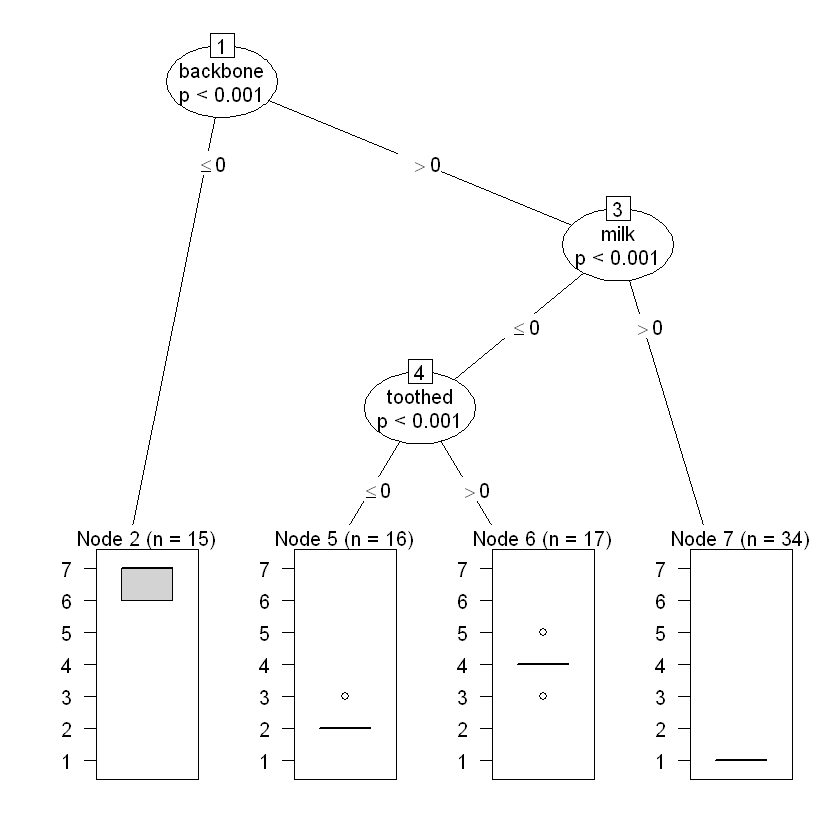

In [6]:
plot(model) #트리 그래프

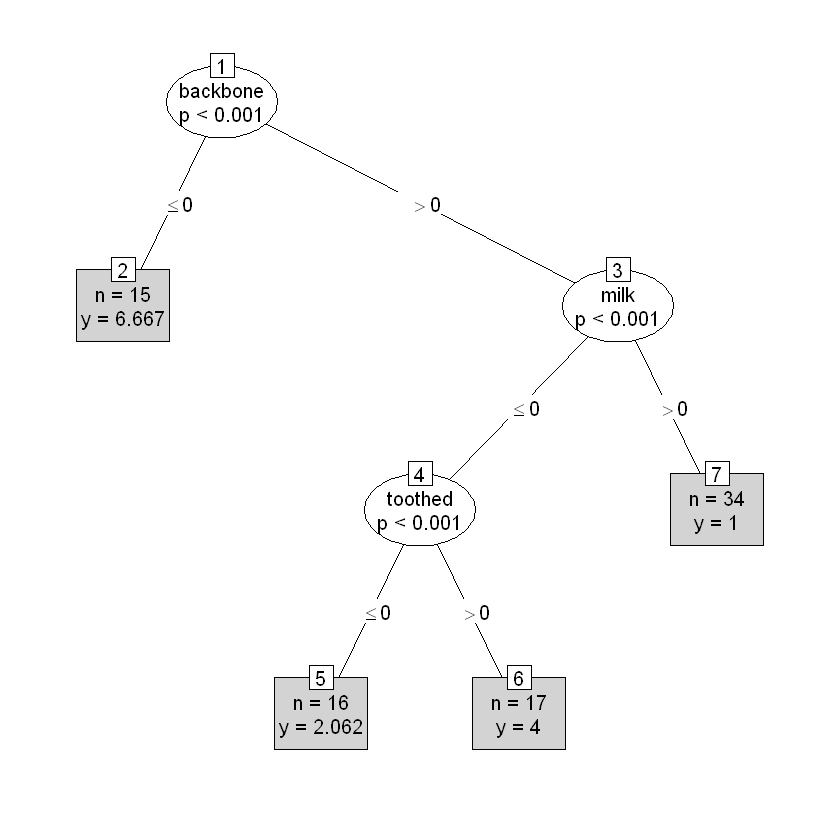

In [7]:
plot(model,type='simple')

In [8]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train)
mean(round(pred) == y_train) # 85.3%
table(round(pred),y_train) #데이터가 적어서 세로축이 다 자오지 않음

[1] 0.8536585

   y_train
     1  2  3  4  5  6  7
  1 34  0  0  0  0  0  0
  2  0 15  1  0  0  0  0
  4  0  0  3 11  3  0  0
  7  0  0  0  0  0  5 10

In [36]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test)
mean(round(pred) == y_test) # 73.6%
#table(round(pred),y_test)

[1] 0.7368421

In [37]:
#랜덤포레스트 모형 (트리갯수 10)
library(randomForest)
set.seed(1)
model<-randomForest(class_type ~ . , data=train,
                    mtry=floor(sqrt(ncol(train))),ntree=10,
                    importance=T)
model


Call:
 randomForest(formula = class_type ~ ., data = train, mtry = floor(sqrt(ncol(train))),      ntree = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 10
No. of variables tried at each split: 4

          Mean of squared residuals: 0.5290487
                    % Var explained: 88.51

In [38]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train)
mean(round(pred) == y_train) # 96.3%

[1] 0.9634146

In [39]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test)
mean(round(pred) == y_test) # 94.7%

[1] 0.9473684

In [17]:
importance(model) #변수의 정확도,중요도

,%IncMSE,IncNodePurity
hair,1.688047,24.9629810
feathers,1.741983,5.1062706
eggs,2.414366,50.8897846
milk,1.811382,39.3219657
airborne,1.194400,6.5638261
aquatic,1.075107,9.9782166
predator,2.182253,0.4322311
toothed,2.381841,9.0366524
backbone,4.889511,119.8805797
breathes,1.629410,22.4057825


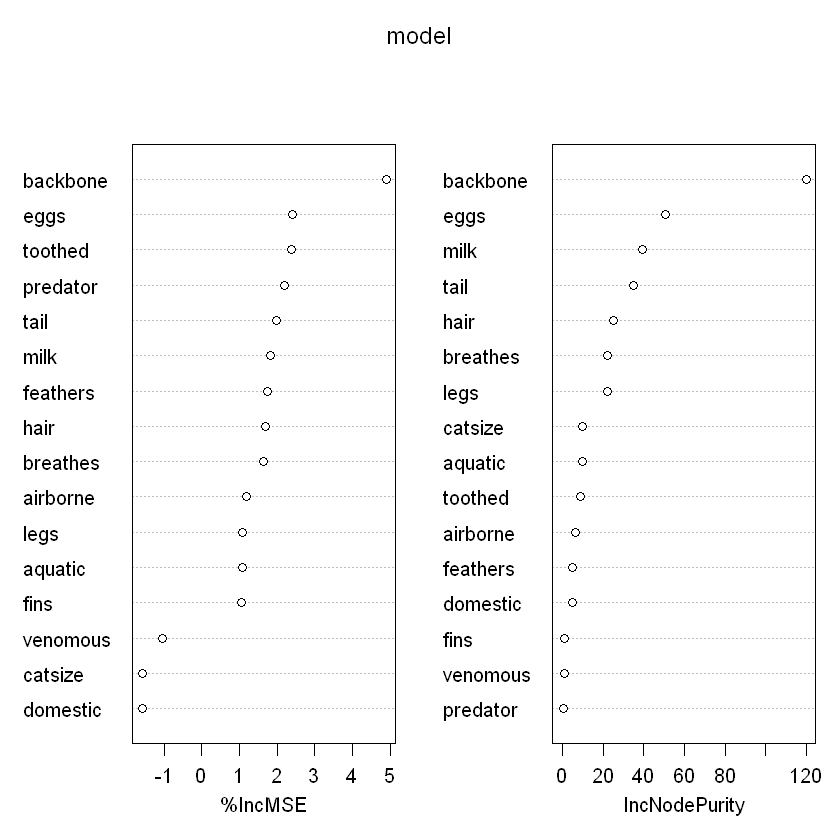

In [18]:
varImpPlot(model)